# 📝 Modelado de Tópicos con LDA (Latent Dirichlet Allocation)

Este notebook aplica **LDA (Latent Dirichlet Allocation)** para analizar textos de **Hernán Casciari** y extraer temas principales presentes en su obra.

---

## 🎯 Objetivos
- Procesar textos de Casciari.  
- Preprocesar los datos con **tokenización, lematización y stopwords**.  
- Aplicar el modelo **LDA** para descubrir tópicos latentes.  
- Visualizar los resultados para interpretar los temas.  

---

## 🚀 Metodología
1. **Carga de datos** → recopilación de textos.  
2. **Preprocesamiento**:
   - Conversión a minúsculas.  
   - Eliminación de stopwords y puntuación.  
   - Tokenización y lematización.  
3. **Vectorización**:
   - Uso de **Bag of Words (BoW)** o **TF-IDF** para representar los textos.  
4. **Modelado LDA**:
   - Entrenamiento del modelo con distintos números de tópicos.  
   - Selección del número óptimo según **Coherence Score** o **Perplexity**.  
5. **Visualización**:
   - Distribución de tópicos por documento.  
   - Palabras clave más representativas de cada tópico.  

---

## 📊 Resultados esperados
- Identificación de **tópicos latentes** en los textos de Casciari.  
- Listado de las **palabras más importantes por tópico**.  
- Distribución de temas a lo largo de los documentos.  

---

## ✅ Conclusión
El modelo **LDA** permite descubrir la estructura temática de los textos de Casciari,  
brindando una herramienta poderosa para el análisis literario y el estudio de estilos narrativos.


In [1]:
!pip list | grep nltk

nltk                              3.9.1


In [2]:
!pip list | grep gensim

gensim                            4.3.3


In [3]:
!pip list | grep wordcloud

wordcloud                         1.9.4


In [4]:
"""
Created on Fri Jun 24 18:14:38 2022

@author: Anahí Romo
"""
# https://es.wikipedia.org/wiki/Latent_Dirichlet_Allocation
# https://towardsdatascience.com/latent-dirichlet-allocation-lda-9d1cd064ffa2
# https://towardsdatascience.com/topic-modeling-and-latent-dirichlet-allocation-in-python-9bf156893c24
# https://www.aprendemachinelearning.com/procesamiento-del-lenguaje-natural-nlp/
# https://www.aprendemachinelearning.com/ejercicio-nlp-cuentos-de-hernan-casciari-python-espanol/
# http://blog.echen.me/2011/08/22/introduction-to-latent-dirichlet-allocation/
# https://github.com/jbagnato/machine-learning/tree/master/nlp
# https://github.com/jbagnato/machine-learning/blob/master/nlp/nlp_cuentos_casciari.ipynb


'''    QUÉ TIENE HERNÁN CASCIARI EN LA CABEZA
Hoja de Ruta
0. Instalar librerías
pip install ntlk, gensim, scipy, wordcloud

1. Obtener los Datos (los cuentos) ->  los descargamos de
https://github.com/jbagnato/machine-learning/blob/master/nlp/blog.zip
2. Exploración Inicial
3. Limpieza de datos
4. Análisis Exploratorio
5. Modelado de Tópicos

!pip install nltk
!pip install gensim
!pip install wordcloud
'''

'    QUÉ TIENE HERNÁN CASCIARI EN LA CABEZA\nHoja de Ruta\n0. Instalar librerías\npip install ntlk, gensim, scipy, wordcloud\n\n1. Obtener los Datos (los cuentos) ->  los descargamos de\nhttps://github.com/jbagnato/machine-learning/blob/master/nlp/blog.zip\n2. Exploración Inicial\n3. Limpieza de datos\n4. Análisis Exploratorio\n5. Modelado de Tópicos\n\n!pip install nltk\n!pip install gensim\n!pip install wordcloud\n'

In [5]:
import pickle
import pandas as pd
import re
import string
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import PlaintextCorpusReader
from nltk import word_tokenize, pos_tag
import scipy
import gensim


In [6]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /Users/abc/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/abc/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [7]:
!wget https://github.com/palasatenea66/DATASETS/raw/main/blog.zip

zsh:1: command not found: wget


In [8]:
!unzip log.zip

unzip:  cannot find or open log.zip, log.zip.zip or log.zip.ZIP.


In [9]:
!ls

CLUSTERING_10_LDA_CASCIARI.ipynb LDirichletAllocator.pdf


In [10]:
# Cargamos los cuentos descargados

anios = ['2004','2005','2006','2007','2008','2009','2010','2011','2012','2013',
         '2014','2015']

data = {}
for i, c in enumerate(anios):
    with open(c + ".txt", "rb") as file:
        data[c] = pickle.load(file)
# Revisamos que se haya guardado bien
print(data.keys())
# Veamos algun trozo de texto
print(data['2008'][1000:1222])

# Combine it!
data_combined = {key: [value] for (key, value) in data.items()}

# We can either keep it in dictionary format or put it into a pandas dataframe

pd.set_option('max_colwidth',150)

data_df = pd.DataFrame.from_dict(data_combined).transpose()
data_df.columns = ['transcript']
data_df = data_df.sort_index()

FileNotFoundError: [Errno 2] No such file or directory: '2004.txt'

In [ ]:
#%%     Características del primer dataframe

print(data_df.head())
print(data_df.tail())
data_df.shape


                                                                                                                                                 transcript
2004  Ayer di por finalizada la primera etapa de un experimento de ficción llamado Más respeto, que soy tu madre, en el que usé el recurso de la bitácor...
2005  Nunca en la puta vida me hubiera imaginado que el diario, siempre plagado de maremotos y de incendios de discotecas, pudiera traer alguna vez una ...
2006  Más o menos una vez por semana recibo correos de lectores que me informan que han visto textos míos firmados por otros, o no firmados pero sí apro...
2007  Desde hace días la Nina quiere interactuar conmigo. Todavía es prematuro decir que intenta tener una relación estable, pero ya empiezo a oír los e...
2008  De pronto yo estaba en el hogar donde pasé la infancia; lo supo primero mi nariz. Los ojos se acostumbran tarde a la penumbra, pero mi olfato reco...
                                                                

(12, 1)

In [ ]:
#%%     LIMPIAMOS UN POCO LOS DATOS: pasamos a minúsculas, eliminando signos de
#       puntuación, comillas, retornos de carro, tabuladores, otros indeseables
#       Retenemos palabras con tilde

# Apply a first round of text cleaning techniques

def clean_text_round1(texto):
    '''Make text lowercase, remove text in square brackets, remove punctuation
    and remove words containing numbers.'''
    texto = texto.lower()
    texto = re.sub('\[.*?¿\]\%', ' ', texto)
    texto = re.sub('[%s]' % re.escape(string.punctuation), ' ', texto)
    texto = re.sub('\w*\d\w*', '', texto)
    return texto

round1 = lambda x: clean_text_round1(x)

data_clean = pd.DataFrame(data_df.transcript.apply(round1))

# Apply a second round of cleaning
def clean_text_round2(texto):
    '''Get rid of some additional punctuation and non-sensical text that was
    missed the first time around.'''
    texto = re.sub('[‘’“”…«»]', '', texto)
    texto = re.sub('\n', ' ', texto)
    return texto

round2 = lambda x: clean_text_round2(x)

data_clean = pd.DataFrame(data_clean.transcript.apply(round2))
print(data_clean.shape)

# Let's pickle it for later use
data_df.to_pickle("corpus.pkl")

data_clean

(12, 1)


,transcript
2004,ayer di por finalizada la primera etapa de un experimento de ficción llamado más respeto que soy tu madre en el que usé el recurso de la bitácor...
2005,nunca en la puta vida me hubiera imaginado que el diario siempre plagado de maremotos y de incendios de discotecas pudiera traer alguna vez una ...
2006,más o menos una vez por semana recibo correos de lectores que me informan que han visto textos míos firmados por otros o no firmados pero sí apro...
2007,desde hace días la nina quiere interactuar conmigo todavía es prematuro decir que intenta tener una relación estable pero ya empiezo a oír los e...
2008,de pronto yo estaba en el hogar donde pasé la infancia lo supo primero mi nariz los ojos se acostumbran tarde a la penumbra pero mi olfato reco...
2009,google ha lanzado esta semana latitude un servicio gratuito que permite ubicar mediante el celular a los contactos de la agenda que den su cons...
2010,leo en la prensa económica que entre las varias empresas que tienen pensado salir a bolsa este año se encuentra polaroid y me sorprende leer el...
2011,esto pasó ayer chichita caminaba por una playa desierta en mar azul costa atlántica argentina con su revista y su sombrilla y unos chicos dij...
2012,escribo esto justo cuando el contador llega a dos mil por lo tanto mantenemos el ritmo a pesar de los días de turrones y petardos mientras nace...
2013,menos de once segundos antes cuando el jugador argentino recibe el pase de un compañero el reloj en méxico marca las trece horas doce minutos y...


In [ ]:
!ls

2004.txt  2007.txt  2010.txt  2013.txt	casciari.zip	sample_data
2005.txt  2008.txt  2011.txt  2014.txt	casciari.zip.1	spanish.txt
2006.txt  2009.txt  2012.txt  2015.txt	corpus.pkl


#%%    CREAMOS EL 'BAG OF WORDS'

# Vamos a crear una matriz documento-término (Document-Term Matrix, DTM)
# usando CountVectorizer y eliminando stopwords en español

# Abrimos el archivo de stopwords en español y las guardamos en una lista
with open('spanish.txt') as f:
    lines = f.read().splitlines()

# Creamos el objeto CountVectorizer con las stopwords cargadas
cv = CountVectorizer(stop_words=lines)

# Ajustamos y transformamos la columna 'transcript' del DataFrame data_clean
# Esto devuelve una matriz dispersa con conteo de palabras
data_cv = cv.fit_transform(data_clean.transcript)

# Convertimos la matriz dispersa en un DataFrame de Pandas
# - Filas = documentos
# - Columnas = palabras
# - Valores = frecuencias de las palabras
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names_out())

# Ajustamos el índice de data_dtm para que coincida con el índice original
data_dtm.index = data_clean.index

# Guardamos la matriz documento-término en un archivo .pkl
data_dtm.to_pickle("dtm.pkl")

# También guardamos:
# - el dataset limpio (data_clean)
# - el objeto CountVectorizer (cv)
data_clean.to_pickle('data_clean.pkl')
pickle.dump(cv, open("cv.pkl", "wb"))

# Imprimimos la forma de la matriz (número de documentos x número de términos)
print(data_dtm.shape)


In [ ]:
#%%    CREAMOS EL 'BAG OF WORDS'

# Vamos a crear una matriz documento-término (Document-Term Matrix, DTM)
# usando CountVectorizer y eliminando stopwords en español

# Abrimos el archivo de stopwords en español y las guardamos en una lista
with open('spanish.txt') as f:
    lines = f.read().splitlines()

# Creamos el objeto CountVectorizer con las stopwords cargadas
cv = CountVectorizer(stop_words=lines)

# Ajustamos y transformamos la columna 'transcript' del DataFrame data_clean
# Esto devuelve una matriz dispersa con conteo de palabras
data_cv = cv.fit_transform(data_clean.transcript)

# Convertimos la matriz dispersa en un DataFrame de Pandas
# - Filas = documentos
# - Columnas = palabras
# - Valores = frecuencias de las palabras
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names_out())

# Ajustamos el índice de data_dtm para que coincida con el índice original
data_dtm.index = data_clean.index

# Guardamos la matriz documento-término en un archivo .pkl
data_dtm.to_pickle("dtm.pkl")

# También guardamos:
# - el dataset limpio (data_clean)
# - el objeto CountVectorizer (cv)
data_clean.to_pickle('data_clean.pkl')
pickle.dump(cv, open("cv.pkl", "wb"))

# Imprimimos la forma de la matriz (número de documentos x número de términos)
print(data_dtm.shape)


(12, 29714)


In [ ]:
#%%       Cargamos el Bag of Words limpio y listo en un dataframe
data = pd.read_pickle('dtm.pkl')
data = data.transpose()

print(data.shape)
data

(29714, 12)


,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
abajo,10,15,4,9,9,0,8,7,8,0,13,6
abananados,0,0,0,0,0,0,0,0,0,0,1,0
abandonaba,1,0,0,0,0,0,0,0,1,0,0,0
abandonado,1,0,0,0,0,0,0,0,0,0,0,0
abandonar,0,0,0,1,0,0,2,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
útimo,1,0,0,0,0,0,0,0,0,0,0,0
českomoravský,0,0,0,0,1,0,0,0,0,0,0,0
české,0,0,0,0,1,0,0,0,0,0,0,0
šeredova,0,0,0,0,1,0,0,0,0,0,0,0


In [ ]:
#%%   PALABRAS MÁS USADAS POR AÑO

top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))
#print(top_dict)
# Print the top 15 words by year
for anio, top_words in top_dict.items():
    print(anio)
    print(', '.join([word for word, count in top_words[0:14]]))

2004
si, alex, vez, lucas, cada, dos, ahora, ser, después, casa, años, siempre, nadie, ver
2005
si, dos, vez, años, siempre, ser, vida, tiempo, hace, ahora, entonces, mundo, después, dice
2006
si, años, dos, vez, siempre, hace, mundo, ser, ahora, entonces, cada, vida, mismo, casa
2007
si, siempre, dos, entonces, vez, años, nunca, ahora, sólo, después, mundo, ser, casa, vida
2008
dos, si, años, casa, vez, ahora, después, siempre, entonces, hace, ser, tarde, mismo, tiempo
2009
años, si, ahora, casa, vez, después, andrés, dos, ser, vida, hace, tres, entonces, mundo
2010
revista, chiri, si, años, orsai, cada, hacer, dos, ahora, ser, hace, vez, casa, lectores
2011
orsai, revista, número, lectores, dos, si, vez, chiri, años, ahora, hace, cada, siempre, revistas
2012
orsai, dos, cada, si, revista, vez, dijo, chiri, ahora, después, tiempo, mismo, argentina, hace
2013
si, dos, años, cada, dijo, papelitos, ve, después, ahora, vez, tres, nunca, tarde, noche
2014
si, vez, dos, años, después, tres,

In [ ]:
#%%   AGREGAMOS STOP WORDS

# Queremos detectar palabras que aparecen en el top de muchos años distintos
# y considerarlas como stopwords personalizadas (poco informativas).

# Lista vacía donde vamos a ir guardando las top words de cada año
words = []

# Recorremos cada año en las columnas del DataFrame 'data'
for anio in data.columns:
    # Extraemos las palabras (sin los conteos) del top_dict de ese año
    top = [word for (word, count) in top_dict[anio]]
    # Agregamos esas palabras a la lista global 'words'
    for t in top:
        words.append(t)

# Mostramos todas las palabras top acumuladas y sus frecuencias
# Esto nos dice qué palabras aparecen como top en varios años
print(Counter(words).most_common())

# Creamos la lista de nuevas stopwords personalizadas:
# seleccionamos aquellas palabras que aparecen como top en más de 6 años distintos
add_stop_words = [word for word, count in Counter(words).most_common() if count > 6]

# Mostramos la lista final de palabras que vamos a agregar como stopwords
print(add_stop_words)


[('si', 12), ('vez', 12), ('cada', 12), ('dos', 12), ('ahora', 12), ('después', 12), ('casa', 12), ('años', 12), ('hace', 12), ('nunca', 11), ('siempre', 10), ('mundo', 10), ('día', 10), ('mismo', 10), ('ser', 9), ('vida', 9), ('tiempo', 9), ('entonces', 9), ('hacer', 9), ('chiri', 9), ('dijo', 8), ('tres', 7), ('bien', 6), ('noche', 6), ('cosas', 5), ('así', 5), ('gente', 5), ('tarde', 5), ('nadie', 4), ('veces', 4), ('orsai', 4), ('lucas', 3), ('ver', 3), ('menos', 3), ('cuatro', 3), ('revista', 3), ('lectores', 3), ('número', 3), ('revistas', 3), ('solo', 3), ('alex', 2), ('tan', 2), ('mejor', 2), ('dice', 2), ('primera', 2), ('sólo', 2), ('decir', 2), ('hombre', 2), ('argentino', 2), ('todavía', 2), ('semana', 2), ('mil', 2), ('cabeza', 1), ('va', 1), ('casi', 1), ('mujer', 1), ('andrés', 1), ('gelós', 1), ('pablo', 1), ('salas', 1), ('sido', 1), ('paola', 1), ('diez', 1), ('ustedes', 1), ('proyecto', 1), ('medio', 1), ('idea', 1), ('año', 1), ('argentina', 1), ('cinco', 1), ('gord

In [ ]:
#%%      SACAMOS LAS STOP WORDS DEL DATASET,
#        LA ELECCIÓN DE LAS MISMAS PUEDE SER UN POCO ARBITRARIA...

# Leemos el dataset previamente limpiado (data_clean.pkl)
data_clean = pd.read_pickle('data_clean.pkl')

# Cargamos las stopwords originales desde el archivo 'spanish.txt'
with open('spanish.txt') as f:
    stop_words = f.read().splitlines()

# Agregamos las stopwords detectadas automáticamente (add_stop_words)
# Son palabras que aparecían en el top de muchos años
for pal in add_stop_words:
    stop_words.append(pal)

# Agregamos manualmente algunas stopwords adicionales (overcoding)
# Esto es arbitrario: nombres propios, números, palabras poco informativas, etc.
more_stop_words = [
    'alex','lucas','andrés','mirta','tres','primer','primera',
    'dos','uno','veces','así','luego','quizá','cosa','cosas',
    'tan','asi','andres','todas','sólo','jesús','pablo','pepe'
]
for pal in more_stop_words:
    stop_words.append(pal)

# Volvemos a crear la matriz documento-término (DTM),
# esta vez excluyendo todas las stopwords definidas arriba
cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data_clean.transcript)

# Convertimos la matriz dispersa en DataFrame
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names_out())
data_stop.index = data_clean.index

# Guardamos los resultados para usarlos más adelante:
# - el CountVectorizer con stopwords (cv_stop.pkl)
# - la nueva matriz documento-término (dtm_stop.pkl)
pickle.dump(cv, open("cv_stop.pkl", "wb"))
data_stop.to_pickle("dtm_stop.pkl")


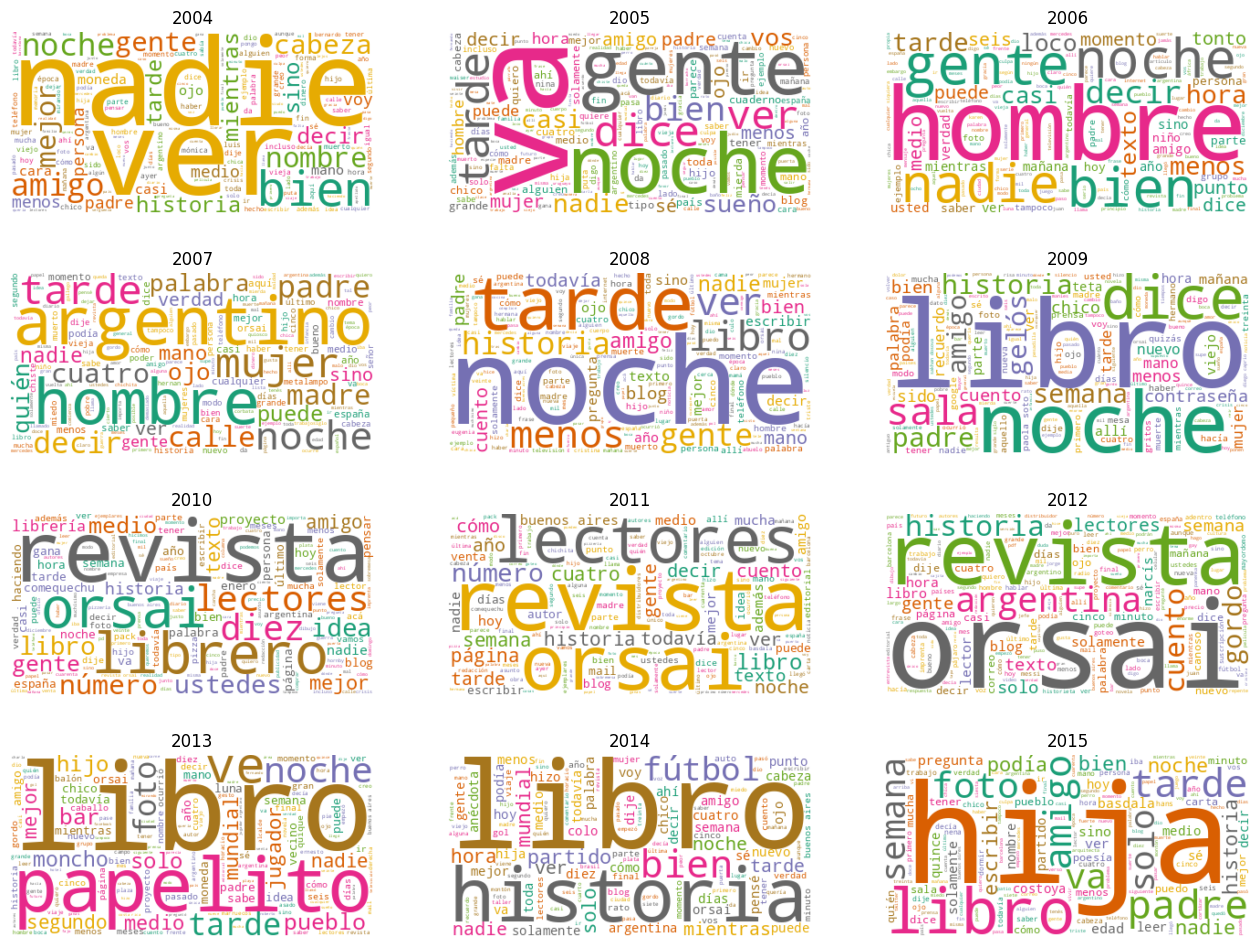

In [ ]:
#%%    NUBES DE PALABRAS

wc = WordCloud(stopwords=stop_words,background_color="white",colormap="Dark2",
               max_font_size=150, random_state=42)

plt.rcParams['figure.figsize'] = [16,12]

# Create subplots for each anio
for index, anio in enumerate(data.columns):
    wc.generate(data_clean.transcript[anio])
    plt.subplot(4, 3, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(anios[index])
plt.show()

In [ ]:
# 📘 Conteo de palabras únicas por año en la matriz documento–término

# Lo que hacemos acá es recorrer cada columna de la DTM (cada año),
# contar cuántas palabras aparecen al menos una vez (frecuencia > 0),
# y guardar esos valores en una lista. Luego armamos un DataFrame con
# el año y la cantidad de palabras únicas, y lo ordenamos para análisis.

unique_list = []
for anio in data.columns:
    uniques = data[anio].to_numpy().nonzero()[0].size  # cantidad de palabras únicas en ese año
    unique_list.append(uniques)

# Creamos un DataFrame con dos columnas:
# - Anio: el año correspondiente
# - unique_words: el número de palabras únicas detectadas
data_words = pd.DataFrame(list(zip(anios, unique_list)), columns=(['Anio', 'unique_words']))

# Ordenamos por cantidad de palabras únicas (no se imprime aún, solo queda guardado)
data_unique_sort = data_words.sort_values('unique_words')

# Mostramos la tabla de conteo de palabras únicas por año
data_words


,Anio,unique_words
0,2004,6543
1,2005,8877
2,2006,8150
3,2007,7157
4,2008,8998
5,2009,3502
6,2010,4750
7,2011,6843
8,2012,4221
9,2013,4592


In [ ]:
data_unique_sort

,Anio,unique_words
5,2009,3502
8,2012,4221
11,2015,4555
9,2013,4592
6,2010,4750
0,2004,6543
7,2011,6843
10,2014,6879
3,2007,7157
2,2006,8150


In [ ]:
data.index

Index(['abajo', 'abananados', 'abandonaba', 'abandonado', 'abandonar',
       'abandonaron', 'abandoné', 'abandonó', 'abanico', 'abaraja',
       ...
       'único', 'únicos', 'útero', 'útil', 'útiles', 'útimo', 'českomoravský',
       'české', 'šeredova', 'šeredovà'],
      dtype='object', length=29714)

In [ ]:
# Find the total number of words per Year
posts_per_year = [50, 27, 18, 50, 42, 22, 50, 33, 31, 17, 33, 13]
total_list = []
dat=data
for anio in dat.columns:
    totals = sum(dat[anio])
    total_list.append(totals)
total_list


[16496,
 27293,
 22215,
 18462,
 27276,
 7256,
 12930,
 21208,
 9840,
 11695,
 20173,
 11432]

In [ ]:
# Let's add some columns to our dataframe
data_words['total_words'] = total_list
data_words['posts_per_year'] = posts_per_year
data_words['words_per_posts'] = data_words['total_words'] / data_words['posts_per_year']

# Sort the dataframe by words per minute to see who talks the slowest and fastest
data_wpm_sort = data_words.sort_values('words_per_posts')
data_wpm_sort

,Anio,unique_words,total_words,posts_per_year,words_per_posts
6,2010,4750,12930,50,258.600000
8,2012,4221,9840,31,317.419355
5,2009,3502,7256,22,329.818182
0,2004,6543,16496,50,329.920000
3,2007,7157,18462,50,369.240000
10,2014,6879,20173,33,611.303030
7,2011,6843,21208,33,642.666667
4,2008,8998,27276,42,649.428571
9,2013,4592,11695,17,687.941176
11,2015,4555,11432,13,879.384615


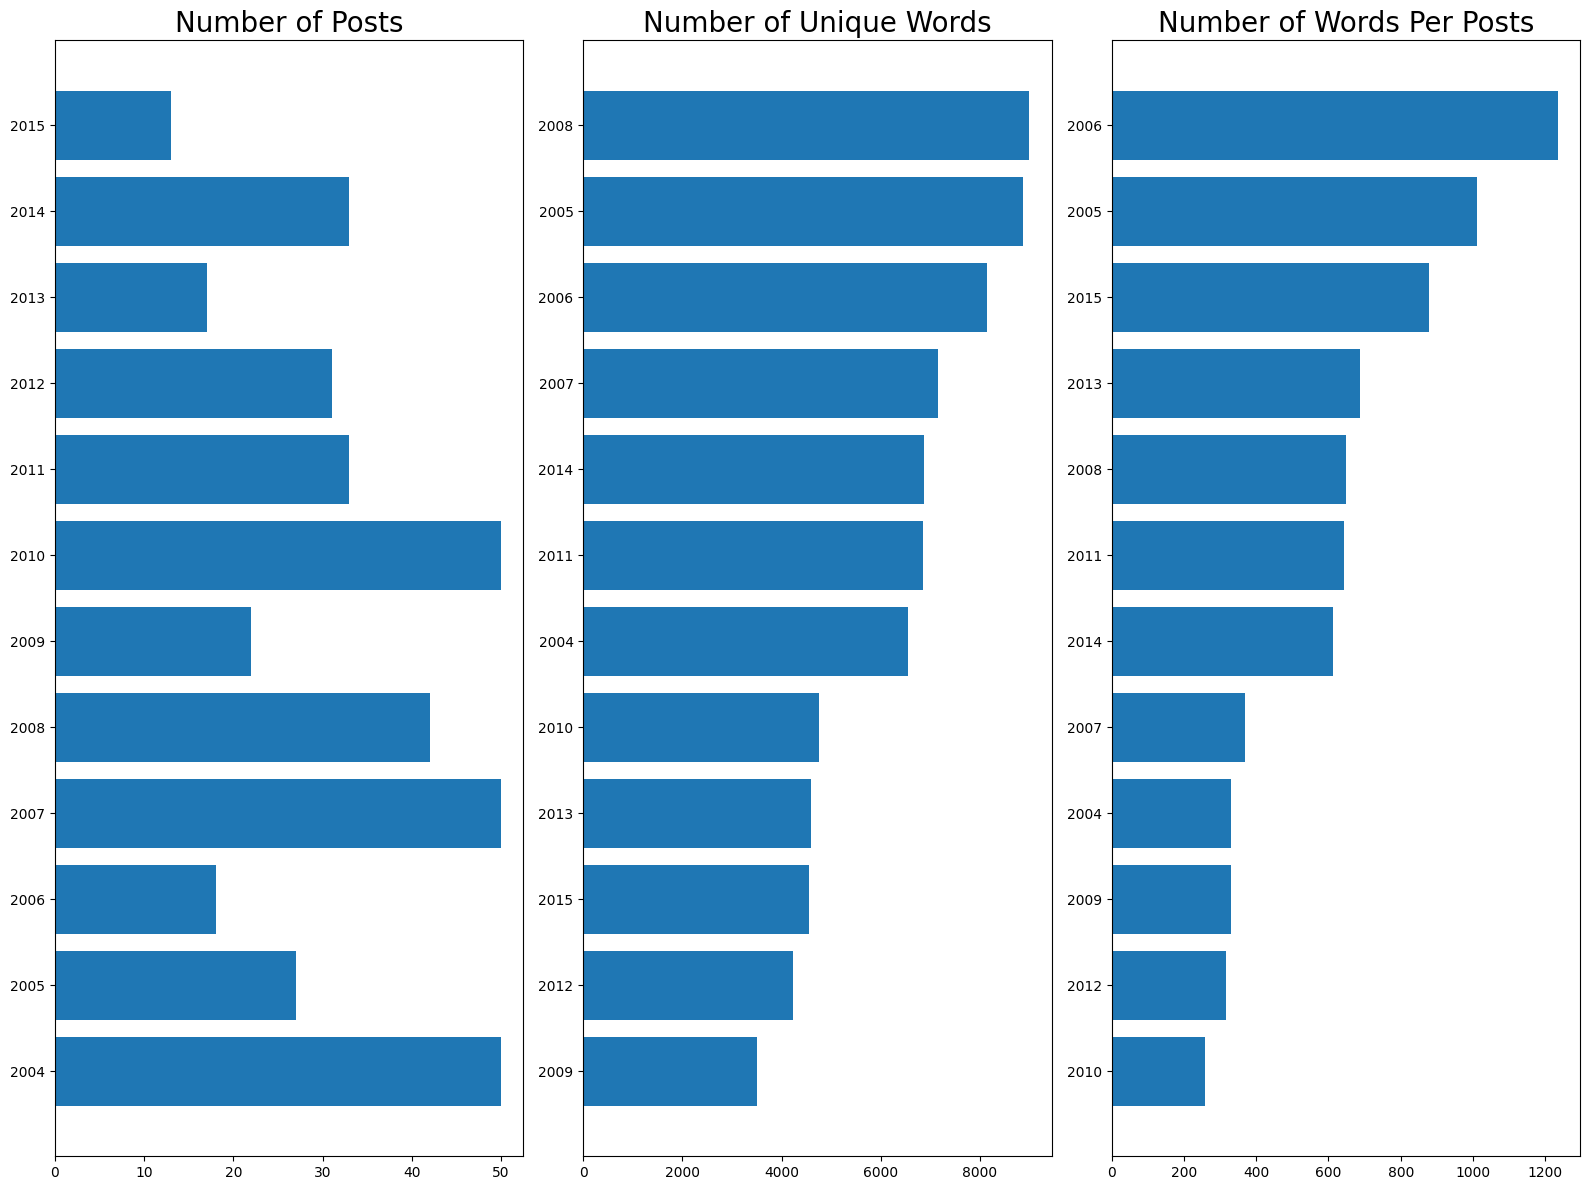

In [ ]:
import numpy as np
y_pos = np.arange(len(data_words))

plt.subplot(1, 3, 1)
plt.barh(y_pos,posts_per_year, align='center')
plt.yticks(y_pos, anios)
plt.title('Number of Posts', fontsize=20)


plt.subplot(1, 3, 2)
plt.barh(y_pos, data_unique_sort.unique_words, align='center')
plt.yticks(y_pos, data_unique_sort.Anio)
plt.title('Number of Unique Words', fontsize=20)

plt.subplot(1, 3, 3)
plt.barh(y_pos, data_wpm_sort.words_per_posts, align='center')
plt.yticks(y_pos, data_wpm_sort.Anio)
plt.title('Number of Words Per Posts', fontsize=20)

plt.tight_layout()
plt.show()

<Axes: xlabel='Samples', ylabel='Counts'>

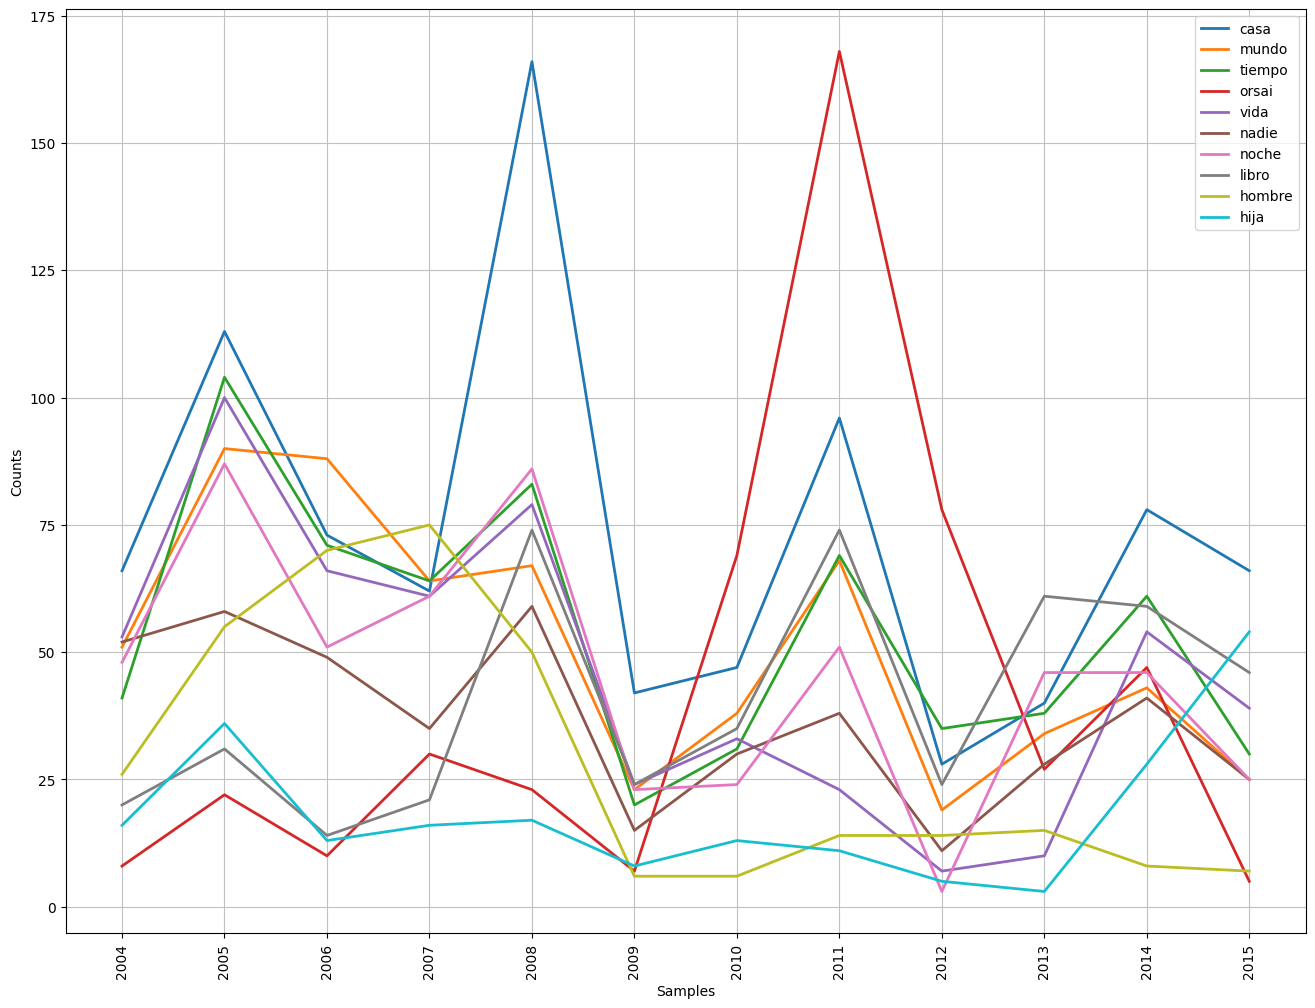

In [ ]:
#%%    VEAMOS LAS PALABRAS MÁS USADAS DE LA NUBE...

corpus_root = './'       # ACÁ ESTÁN LOS ARCHIVOS DE TEXTO
wordlists = PlaintextCorpusReader(corpus_root, '.*', encoding='latin-1')
#wordlists.fileids() # con esto listamos los archivos del directorio
mas_comunes = ['casa','mundo','tiempo','vida', 'hija', 'nadie', 'hombre',
               'noche', 'libro', 'orsai']    # ELECCIÓN +/- ARBITRARIA
cfd = nltk.ConditionalFreqDist(
        (word,genre)
        for genre in anios
        for w in wordlists.words(genre + '.txt')
        for word in mas_comunes
        if w.lower().startswith(word) )
cfd.plot()


In [ ]:
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


True

In [ ]:
#%%  AHORA INTENTAREMOS CLASIFICAR LOS TEMAS, USANDO EL ALGORITMO LDA Y VEAMOS

# 📘 Lo que hace este bloque es preparar los datos y aplicar LDA (Latent Dirichlet Allocation)
# para detectar automáticamente "tópicos" (temas) en las transcripciones.
# 
# Flujo general:
# 1. Se carga la matriz documento-término (con stopwords removidas).
# 2. Se convierte en formato compatible con gensim (corpus e id2word).
# 3. Se crea una versión de los datos solo con sustantivos y adjetivos, ya que son más
#    informativos para modelar tópicos.
# 4. Se reconstruye la DTM filtrada con esos tokens.
# 5. Se entrena un modelo LDA con 3 tópicos y se muestran los resultados.

data = pd.read_pickle('dtm_stop.pkl')                  # cargamos la DTM filtrada
tdm = data.transpose()                                 # transponemos: términos x documentos
sparse_counts = scipy.sparse.csr_matrix(tdm)           # pasamos a matriz dispersa
corpus = gensim.matutils.Sparse2Corpus(sparse_counts)  # lo convertimos en corpus gensim
cv = pickle.load(open("cv_stop.pkl", "rb"))            # cargamos el CountVectorizer usado
id2word = dict((v, k) for k, v in cv.vocabulary_.items()) # diccionario id→palabra

# Función auxiliar: dado un texto, extrae solo sustantivos y adjetivos
def nouns_adj(texto):
    '''Tokeniza un texto y devuelve solo sustantivos (NN) y adjetivos (JJ).'''
    is_noun_adj = lambda pos: pos[:2] == 'NN' or pos[:2] == 'JJ'
    tokenized = word_tokenize(texto)
    nouns_adj = [word for (word, pos) in pos_tag(tokenized) if is_noun_adj(pos)]
    return ' '.join(nouns_adj)

data_clean = pd.read_pickle('data_clean.pkl')          # cargamos el dataset limpio
data_nouns_adj = pd.DataFrame(data_clean.transcript.apply(nouns_adj)) # aplicamos filtro NN+JJ

# Reagregamos stopwords: las originales, las automáticas (add_stop_words) y las manuales (more_stop_words)
with open('spanish.txt') as f:
    stop_words = f.read().splitlines()
for pal in add_stop_words:
    stop_words.append(pal)
for pal in more_stop_words:
    stop_words.append(pal)

# Volvemos a construir una DTM, ahora solo con sustantivos/adjetivos y eliminando palabras comunes (max_df=.8)
cvna = CountVectorizer(stop_words=stop_words, max_df=.8)
data_cvna = cvna.fit_transform(data_nouns_adj.transcript)
data_dtmna = pd.DataFrame(data_cvna.toarray(), columns=cvna.get_feature_names_out())
data_dtmna.index = data_nouns_adj.index

# Creamos el corpus para gensim
corpusna = gensim.matutils.Sparse2Corpus(scipy.sparse.csr_matrix(data_dtmna.transpose()))

# Creamos el diccionario (id → palabra) para gensim
id2wordna = dict((v, k) for k, v in cvna.vocabulary_.items())
dictionary_gensim = gensim.corpora.Dictionary.from_corpus(corpusna, id2word=id2wordna)

# Entrenamos el modelo LDA con 3 tópicos, 10 pasadas sobre el corpus
ldana = gensim.models.LdaModel(corpus=corpusna, num_topics=3, id2word=dictionary_gensim, passes=10)

# Mostramos los 3 tópicos encontrados con sus palabras más representativas
print('Tópicos encontrados (buscamos 3)')
print(ldana.print_topics())


Tópicos encontrados (buscamos 3)
[(0, '0.002*"comequechu" + 0.001*"proyecto" + 0.001*"jugador" + 0.001*"papelitos" + 0.001*"próximo" + 0.001*"páginas" + 0.001*"textos" + 0.001*"charla" + 0.001*"autores" + 0.001*"video"'), (1, '0.001*"luis" + 0.001*"tonto" + 0.001*"niño" + 0.001*"bernardo" + 0.001*"usted" + 0.001*"carlos" + 0.001*"artículo" + 0.001*"puntos" + 0.001*"casciari" + 0.001*"jardín"'), (2, '0.001*"casciari" + 0.001*"cuaderno" + 0.001*"coche" + 0.001*"clase" + 0.001*"corbata" + 0.001*"textos" + 0.001*"jorge" + 0.001*"colo" + 0.001*"quizás" + 0.001*"malo"')]


In [ ]:
len(data_dtmna.index)

12

In [ ]:
# Transformamos el corpus: ahora cada documento se representa
# como una lista de (tópico, probabilidad)
corpus_transformed = ldana[corpusna]

# Para cada documento (doc), buscamos la tupla con mayor probabilidad
# usando max() sobre la lista de (topic_id, prob)
# Nos quedamos solo con el topic_id [0] de esa tupla
lista = [max(doc, key=lambda x: x[1])[0] for doc in corpus_transformed]

# Mostramos cuántos documentos fueron procesados
len(lista)


12

In [ ]:
QTY_TOPICS=5
ldana = gensim.models.LdaModel(corpus=corpusna, num_topics=QTY_TOPICS,
                               id2word=id2wordna, passes=80)

corpus_transformed = ldana[corpusna]
topicos = list(zip([a for [(a,b)] in corpus_transformed], data_dtmna.index))

print(f'Tópicos encontrados (buscamos {QTY_TOPICS})')
ldana.print_topics()

Tópicos encontrados (buscamos 5)


[(0,
  '0.000*"niño" + 0.000*"quizás" + 0.000*"textos" + 0.000*"casciari" + 0.000*"éste" + 0.000*"clase" + 0.000*"luis" + 0.000*"usted" + 0.000*"nacional" + 0.000*"descubre"'),
 (1,
  '0.002*"salas" + 0.002*"gelós" + 0.002*"soto" + 0.002*"quizás" + 0.002*"paola" + 0.001*"caprio" + 0.001*"diego" + 0.001*"contraseña" + 0.001*"google" + 0.001*"sakhan"'),
 (2,
  '0.001*"textos" + 0.001*"proyecto" + 0.001*"comequechu" + 0.001*"páginas" + 0.001*"próximo" + 0.001*"luis" + 0.001*"corbata" + 0.001*"humor" + 0.001*"librero" + 0.001*"niño"'),
 (3,
  '0.001*"jugador" + 0.001*"papelitos" + 0.001*"jorge" + 0.001*"cuaderno" + 0.001*"clase" + 0.001*"coche" + 0.001*"waiser" + 0.001*"niño" + 0.001*"charla" + 0.001*"blogs"'),
 (4,
  '0.003*"casciari" + 0.002*"colo" + 0.002*"twitter" + 0.001*"mundiales" + 0.001*"taller" + 0.001*"brasil" + 0.001*"taxista" + 0.001*"anécdotas" + 0.001*"campeón" + 0.001*"anécdota"')]

In [ ]:
topicos

[(2, '2004'),
 (3, '2005'),
 (2, '2006'),
 (2, '2007'),
 (3, '2008'),
 (1, '2009'),
 (2, '2010'),
 (2, '2011'),
 (3, '2012'),
 (3, '2013'),
 (4, '2014'),
 (4, '2015')]

In [ ]:
for i, t in enumerate(corpus_transformed):
    print(f'{i} {t}')

0 [(2, 0.9998654)]
1 [(3, 0.9999187)]
2 [(2, 0.9999015)]
3 [(2, 0.999879)]
4 [(3, 0.9999168)]
5 [(1, 0.9996818)]
6 [(2, 0.99981445)]
7 [(2, 0.9998881)]
8 [(3, 0.99976504)]
9 [(3, 0.99980336)]
10 [(4, 0.9998871)]
11 [(4, 0.9997867)]


In [ ]:
ldana.get_topics()

array([[4.2220803e-05, 4.2220814e-05, 4.2220810e-05, ..., 4.2220807e-05,
        4.2220803e-05, 4.2220803e-05],
       [2.7507316e-05, 2.7507322e-05, 2.7507318e-05, ..., 2.7507316e-05,
        2.7507316e-05, 2.7507316e-05],
       [5.3763220e-06, 5.3763206e-06, 3.2098495e-05, ..., 5.3763201e-06,
        5.3763201e-06, 5.3763201e-06],
       [6.2623449e-06, 3.7414658e-05, 6.2623449e-06, ..., 3.7414680e-05,
        3.7414680e-05, 3.7414680e-05],
       [7.6377946e-05, 1.2756210e-05, 1.2756209e-05, ..., 1.2756209e-05,
        1.2756209e-05, 1.2756209e-05]], dtype=float32)

In [ ]:
from gensim.models.coherencemodel import CoherenceModel

# Convert the pandas Series of strings into a list of tokenized texts
tokenized_texts = [text.split() for text in data_nouns_adj.transcript]

coherence_model = CoherenceModel(model=ldana, texts=tokenized_texts, dictionary=dictionary_gensim, coherence='c_v')
coherence_score = coherence_model.get_coherence()
print(coherence_score)

0.5387417926781065


In [ ]:
# https://www.ibm.com/es-es/think/topics/latent-dirichlet-allocation
# https://share.google/HNMQ5WIhviEXti5TQ
# https://ri.itba.edu.ar/server/api/core/bitstreams/162467b1-60d4-4e95-bc21-29f526830652/content

## Define a range of topics

### Subtask:
Specify a range of topic numbers to evaluate (e.g., from 1 to 10 or more, depending on the dataset size).


**Reasoning**:
Define the range and step size for the number of topics to evaluate.



In [ ]:
min_topics = 2
max_topics = 10
step_size = 1
topic_nums = range(min_topics, max_topics + 1, step_size)

## Train lda models and calculate coherence scores

### Subtask:
Iterate through the defined range of topics. For each topic number, train an LDA model and calculate its coherence score. Store the topic numbers and their corresponding coherence scores.


**Reasoning**:
Iterate through the defined range of topics, train an LDA model for each topic number, calculate its coherence score, and store the topic numbers and their corresponding coherence scores.



In [ ]:
coherence_scores = []
for num_topics in topic_nums:
    ldana = gensim.models.LdaModel(corpus=corpusna, num_topics=num_topics, id2word=dictionary_gensim, passes=80)
    coherence_model = CoherenceModel(model=ldana, texts=tokenized_texts, dictionary=dictionary_gensim, coherence='c_v')
    coherence_score = coherence_model.get_coherence()
    coherence_scores.append(coherence_score)

## Visualize coherence scores

### Subtask:
Plot the coherence scores against the number of topics. This visualization will help in identifying the number of topics with the highest coherence score.


**Reasoning**:
Plot the coherence scores against the number of topics to visualize the relationship and identify the optimal number of topics.



In [ ]:
coherence_scores

[0.46531350860388326,
 0.5234444038555182,
 0.49772444824551576,
 0.531604358261454,
 0.5045518837879653,
 0.5229289425957377,
 0.5003747802770053,
 0.5270335229561773,
 0.5012805898947498]

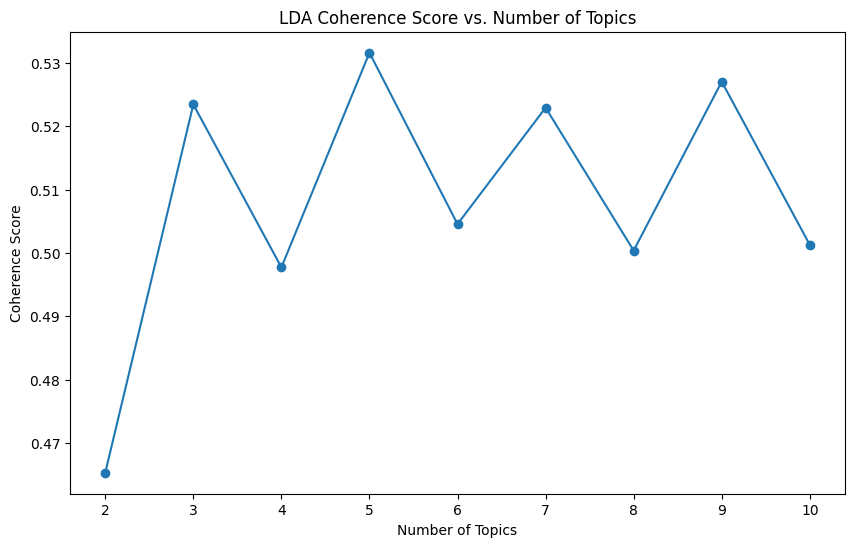

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(topic_nums, coherence_scores, marker='o')
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')
plt.title('LDA Coherence Score vs. Number of Topics')
plt.show()

## Identify the optimal number of topics

### Subtask:
Based on the plot, determine the number of topics that yields the best coherence score.


**Reasoning**:
Based on the generated plot, I will find the index of the maximum coherence score and use it to determine the optimal number of topics from the `topic_nums` list.



In [ ]:
optimal_num_topics = topic_nums[coherence_scores.index(max(coherence_scores))]
print(f"The optimal number of topics is: {optimal_num_topics}")

The optimal number of topics is: 5


## Summary:

### Data Analysis Key Findings

*   The analysis successfully calculated and plotted the coherence scores for LDA models with a range of topic numbers from 2 to 10.
*   By identifying the number of topics corresponding to the maximum coherence score, the optimal number of topics was determined to be 5.

### Insights or Next Steps

*   The optimal number of topics (5) can now be used to train a final LDA model for further analysis of the topics and their associated keywords.
